In [1]:
import yaml
config_path = 'notebooks/default_sampling_nuts.yaml'
with open(config_path, "r") as f:
        config = yaml.safe_load(f)

initial_position = config.get("initial_position", None)
print("Initial position:", initial_position)

for i, chain_init in enumerate(initial_position):
            print(f"Chain {i+1} initial position: {chain_init}")

Initial position: [{'blob0_sigma': 8.0, 'blob0_center': [30.0, 30.0, 30.0], 'blob1_sigma': 8.0, 'blob1_center': [30.0, 30.0, 30.0], 'blob2_sigma': 8.0, 'blob2_center': [30.0, 30.0, 30.0]}, {'blob0_sigma': 8.0, 'blob0_center': [30.0, 30.0, 30.0], 'blob1_sigma': 8.0, 'blob1_center': [30.0, 30.0, 30.0], 'blob2_sigma': 8.0, 'blob2_center': [30.0, 30.0, 30.0]}, {'blob0_sigma': 8.0, 'blob0_center': [30.0, 30.0, 30.0], 'blob1_sigma': 8.0, 'blob1_center': [30.0, 30.0, 30.0], 'blob2_sigma': 8.0, 'blob2_center': [30.0, 30.0, 30.0]}, {'blob0_sigma': 8.0, 'blob0_center': [30.0, 30.0, 30.0], 'blob1_sigma': 8.0, 'blob1_center': [30.0, 30.0, 30.0], 'blob2_sigma': 8.0, 'blob2_center': [30.0, 30.0, 30.0]}]
Chain 1 initial position: {'blob0_sigma': 8.0, 'blob0_center': [30.0, 30.0, 30.0], 'blob1_sigma': 8.0, 'blob1_center': [30.0, 30.0, 30.0], 'blob2_sigma': 8.0, 'blob2_center': [30.0, 30.0, 30.0]}
Chain 2 initial position: {'blob0_sigma': 8.0, 'blob0_center': [30.0, 30.0, 30.0], 'blob1_sigma': 8.0, 'bl

In [9]:
import numpy as np
import jax.numpy as jnp

def flatten_params(d):
    # Auto-detect blob indices, sort by blob number
    blob_idxs = sorted({int(k[4]) for k in d if k.startswith('blob') and '_' in k})
    arr = []
    for i in blob_idxs:
        arr.append(d[f'blob{i}_sigma'])
        arr.extend(d[f'blob{i}_center'])
    return np.array(arr, dtype=np.float32)

print(flatten_params(initial_position[0]))

init_positions = jnp.array([flatten_params(d) for d in initial_position])
print(init_positions.shape[0])

[ 8. 30. 30. 30.  8. 30. 30. 30.  8. 30. 30. 30.]
4


In [1]:
import os

#using GPU, comment out if on CPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1,2,3,7' #change to the GPU you want to use

In [2]:
import jax

jax.devices()

[CudaDevice(id=0), CudaDevice(id=1), CudaDevice(id=2), CudaDevice(id=3)]

In [3]:
import numpy as np

npz_path = '/home/lucasm/Files/DiffNBody-main/nbody-inverse-sampling/results/sampling_results/test_sampling_20250704_141757/samples_by_chain.npz'  # replace with your actual file path
with np.load(npz_path) as data:
    for key in data.files:
        print(f"{key}: {data[key].shape}")

blob0_center: (2, 3, 1000)
blob0_sigma: (2, 1000)


In [5]:
npz_path = '/home/lucasm/Files/DiffNBody-main/nbody-inverse-sampling/results/sampling_results/test_sampling_20250704_141757/rhat_diagnostics.npz'
with np.load(npz_path) as data:
    for key in data.files:
        print(f"{key}: {data[key]}")

blob0_center: [1.7144516 1.9899206 1.98778   1.8868225 2.0355337 2.0083883 2.0116189
 2.1107392 1.9487938 1.911932  2.0115194 2.1875103 2.0308504 2.0325413
 1.9366095 1.828886  1.7696898 1.9499993 1.8802967 1.8313081 2.0644073
 1.9908586 1.9068314 1.8590853 1.9413642 1.9426745 2.0055373 1.9366398
 1.9037814 2.0211916 2.0536194 1.8754758 1.9169006 1.959551  1.7038165
 1.7330467 1.7492523 1.8158832 1.8658174 1.8695426 1.7175485 1.6969347
 1.7659242 1.7581834 1.7348677 1.8098851 1.770989  1.7318834 1.7059753
 1.8141128 1.5610036 1.4594059 1.464008  1.438504  1.5851915 1.66721
 1.6051936 1.5971054 1.6228492 1.4889772 1.455536  1.652595  1.7123679
 1.7607254 1.6350908 1.4793808 1.4568483 1.4248167 1.4192795 1.3967118
 1.4688915 1.6139779 1.5915251 1.44019   1.7640076 1.849993  2.0034564
 1.6531936 1.5559111 1.6406286 1.4933645 1.5510705 1.5629512 1.5492611
 1.5518161 1.4669042 1.454393  1.8317403 1.9428494 1.8422029 2.097706
 2.197002  2.0256755 1.8648118 1.8486753 1.7837528 2.0389016 1.996

In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt

samples_file = "results/sampling_results/test_sampling_20250704_163826/samples_by_chain.npz"

# First, let's see what we have
data = np.load(samples_file)


In [2]:
keys = list(data.keys())
print("Keys in the npz file:", keys)

Keys in the npz file: ['blob0_center', 'blob0_sigma']


(4, 3, 10000)


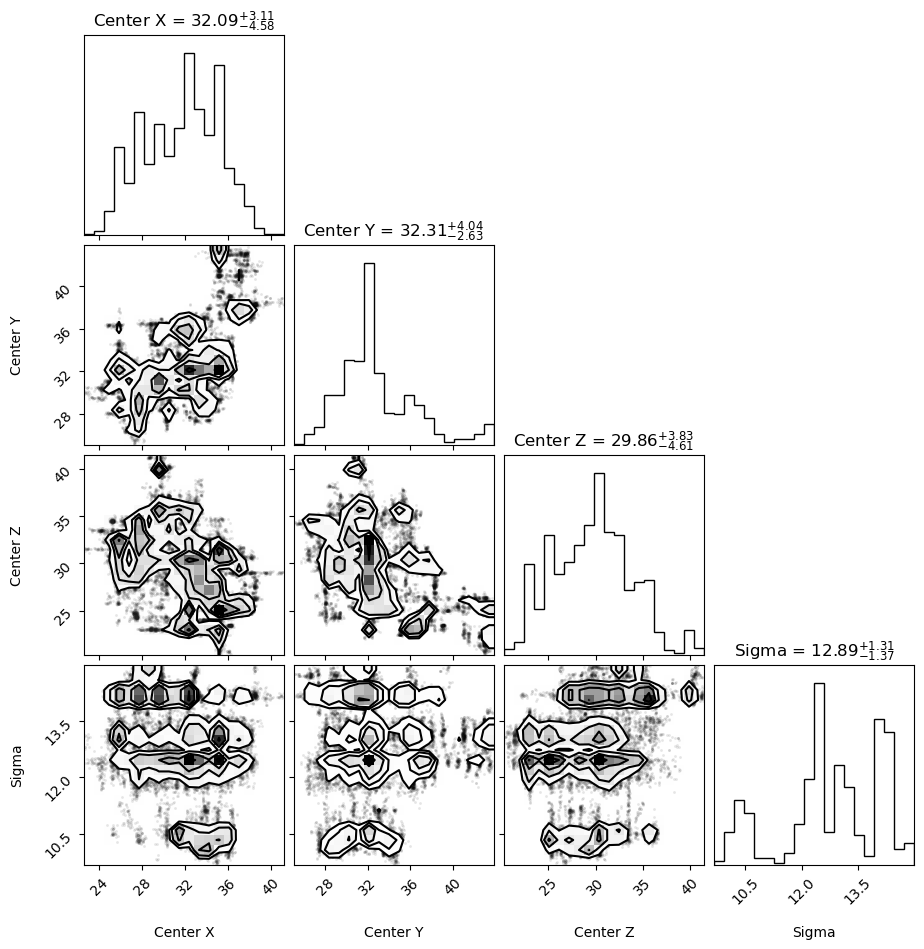

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import corner

# Your existing code
centers = data['blob0_center']
print(centers.shape)  # Should print (1, 3, 2000) if the shape is correct
centers = centers.reshape(1, 3, 40000)
sigmas = data['blob0_sigma']
sigmas = sigmas.reshape(1, 40000)

# Extract individual parameters
center_x = centers[:, 0, :].flatten()  # Shape: (2000,)
center_y = centers[:, 1, :].flatten()  # Shape: (2000,)
center_z = centers[:, 2, :].flatten()  # Shape: (2000,)
sigma = sigmas.flatten()               # Shape: (2000,)

# Combine all parameters into a single array
samples = np.column_stack([center_x, center_y, center_z, sigma])

# Create corner plot
fig = corner.corner(
    samples,
    labels=['Center X', 'Center Y', 'Center Z', 'Sigma'],
    show_titles=True,
    title_kwargs={"fontsize": 12}
)

plt.show()

In [2]:
# Using JAX
import jax
print(f"JAX version: {jax.__version__}")
print(f"JAX devices: {jax.devices()}")

# Check if cuDNN is available
try:
    import jax.extend.backend.get_backend as xla_bridge
    print(f"XLA backend: {xla_bridge.get_backend().platform}")
except:
    print("Could not get XLA backend info")

JAX version: 0.5.3
JAX devices: [CudaDevice(id=0), CudaDevice(id=1), CudaDevice(id=2), CudaDevice(id=3), CudaDevice(id=4), CudaDevice(id=5), CudaDevice(id=6), CudaDevice(id=7)]
Could not get XLA backend info


In [3]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"cuDNN version: {torch.backends.cudnn.version()}")
print(f"cuDNN enabled: {torch.backends.cudnn.enabled}")

PyTorch version: 2.6.0+cu124
CUDA available: False
CUDA version: 12.4
cuDNN version: 90100
cuDNN enabled: True


/home/lucasm/miniconda3/envs/nbody/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 2: out of memory (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
